<a href="https://colab.research.google.com/github/Kezton/Final_Project/blob/main/NewRun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install --upgrade scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
!pip install astroNN

In [ ]:
from astroNN.datasets import load_galaxy10sdss

In [ ]:

images, labels = load_galaxy10sdss()
label = utils.to_categorical(labels, num_classes=10)

/root/.astroNN/datasets/Galaxy10.h5 was found!


In [ ]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [ ]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [ ]:
train_x,test_x=train_test_split(np.arange(labels.shape[0]),test_size=0.1)
train_images,train_labels,test_images,test_labels=images[train_x],label[train_x],images[test_x],label[test_x]

In [ ]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [ ]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth",
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

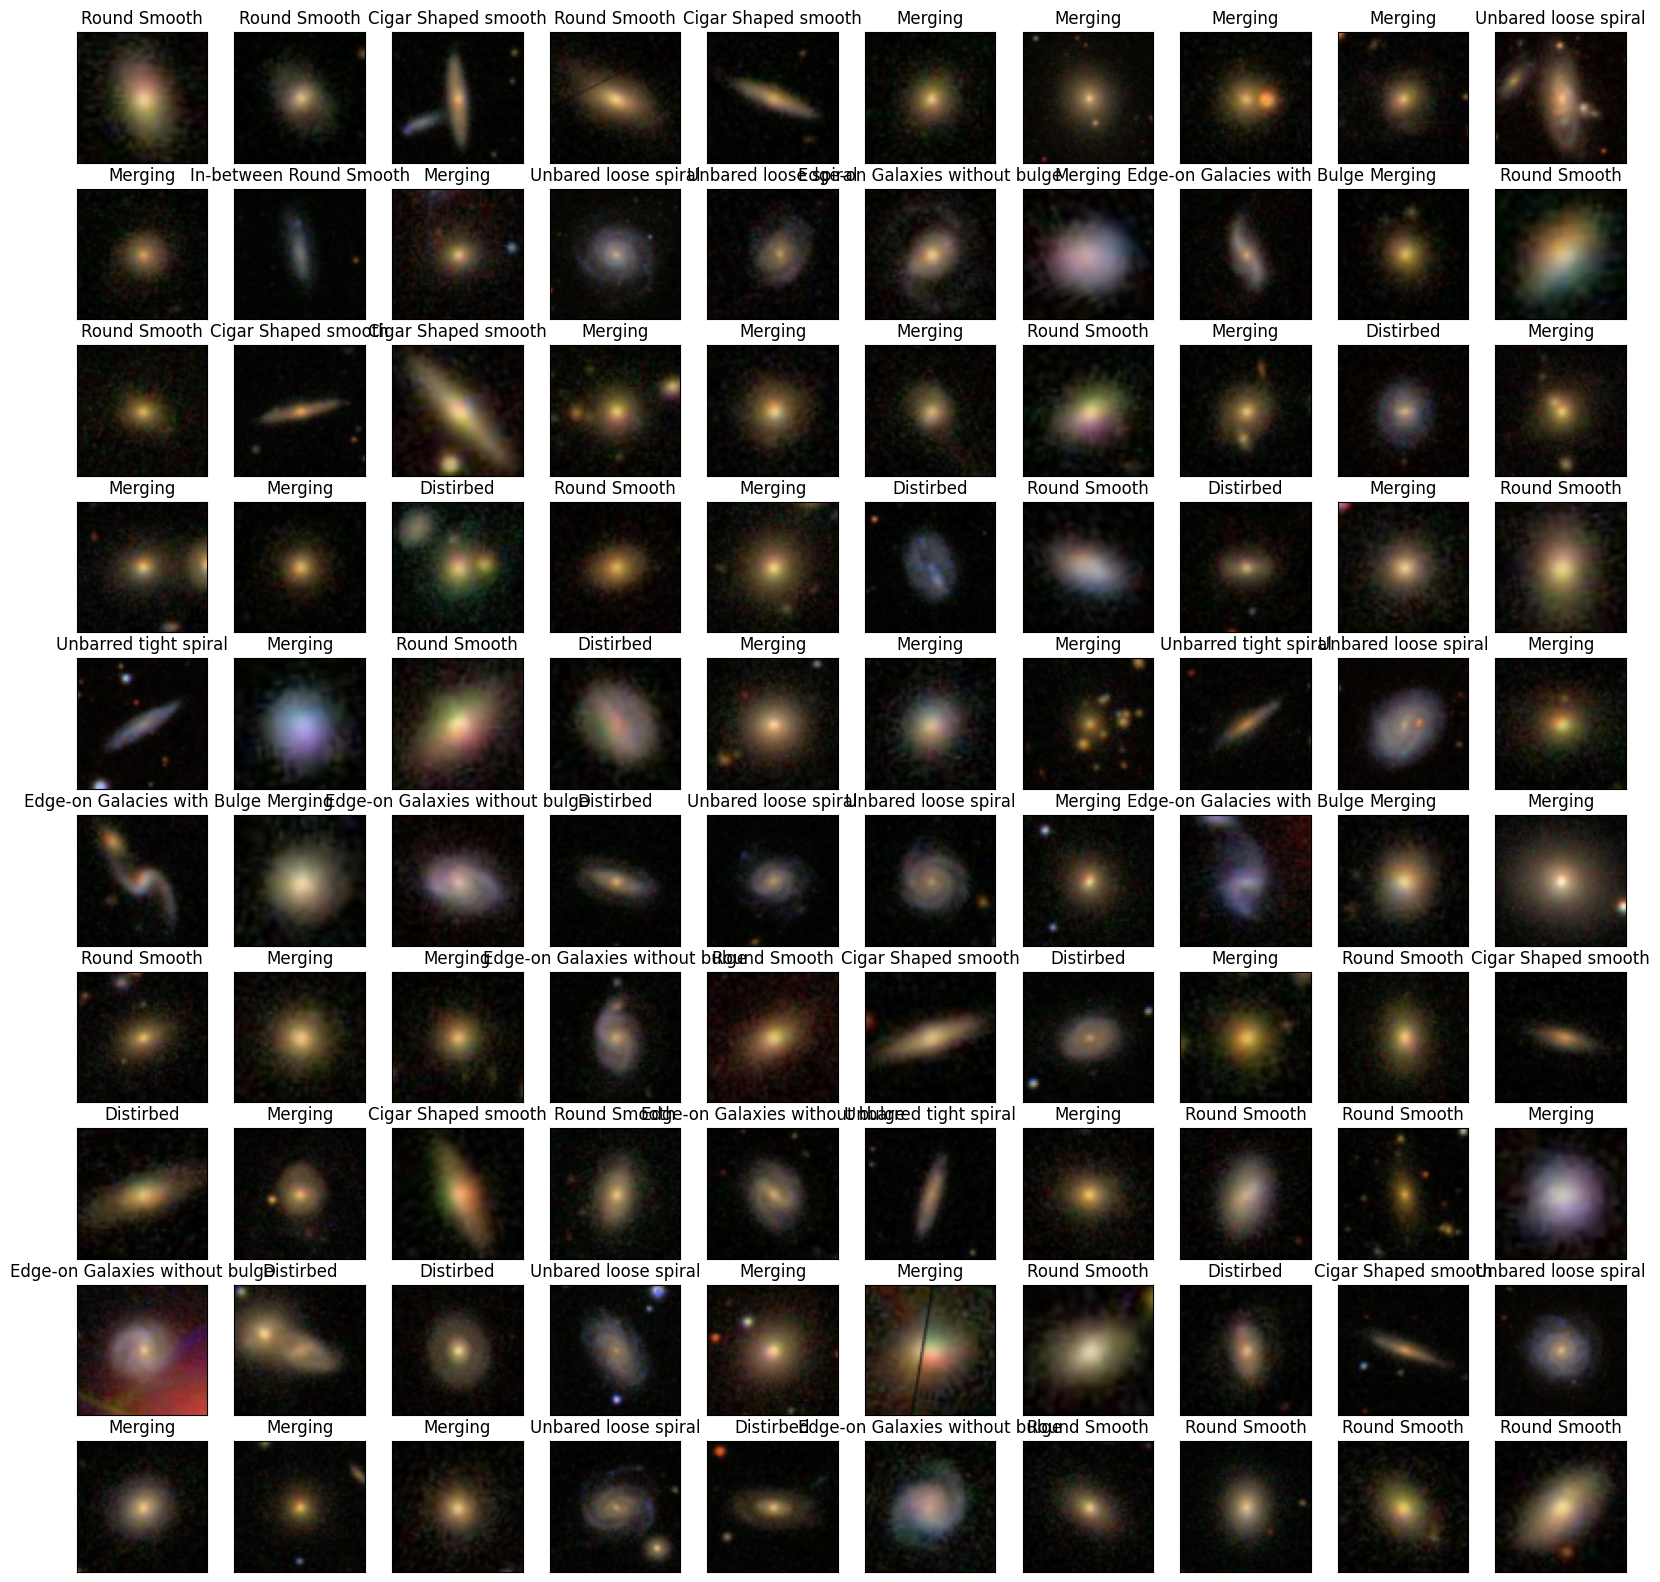

In [ ]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


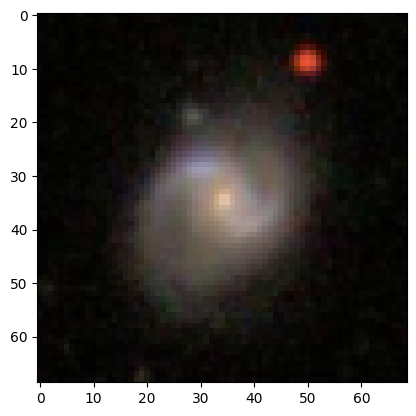

In [ ]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [ ]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

# Value normalization
X_train  = X_train/255
X_test  = X_test/255


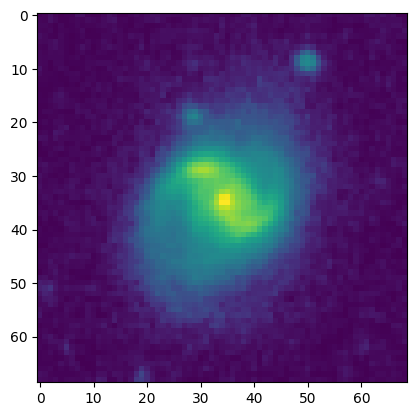

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Defining input shape for CNN
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [ ]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [ ]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1),
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1),
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 69, 69, 16)        160       
                                                                 
 conv2d_6 (Conv2D)           (None, 69, 69, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 34, 34, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 17, 17, 32)       

In [ ]:
model.compile(loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=10
history = model.fit(X_train, train_labels,
                    epochs=5,
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/5
307/307 [==============================] - 116s 369ms/step - loss: 1.6734 - acc: 0.3633 - val_loss: 1.2963 - val_acc: 0.4938
Epoch 2/5
307/307 [==============================] - 112s 364ms/step - loss: 1.3082 - acc: 0.5046 - val_loss: 1.0952 - val_acc: 0.5860
Epoch 3/5
307/307 [==============================] - 110s 360ms/step - loss: 1.1191 - acc: 0.5935 - val_loss: 0.9528 - val_acc: 0.6613
Epoch 4/5
307/307 [==============================] - 119s 387ms/step - loss: 1.0285 - acc: 0.6221 - val_loss: 0.8496 - val_acc: 0.6930
Epoch 5/5
307/307 [==============================] - 115s 374ms/step - loss: 0.9346 - acc: 0.6611 - val_loss: 0.8000 - val_acc: 0.7095


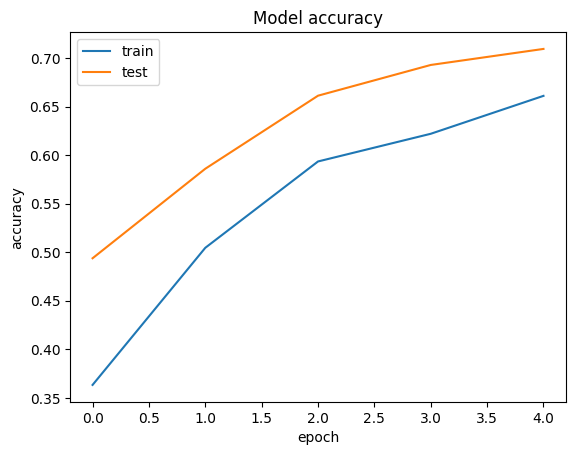

In [ ]:
%matplotlib inline
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

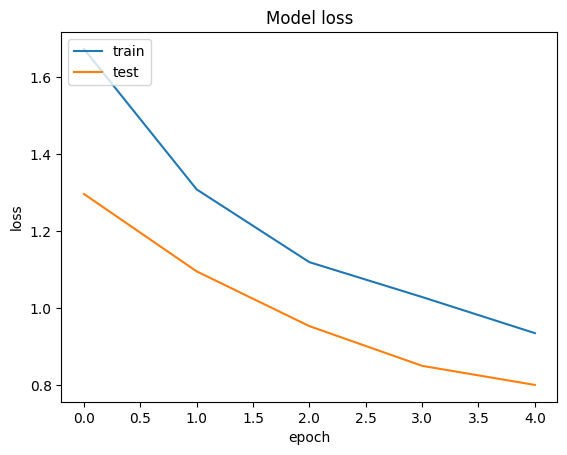

In [ ]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')

69/69 [==============================] - 7s 94ms/step
[[181  58  61   0   4   0   0  45  35  27]
 [ 35 613  54   0   0   0   0   3   0   1]
 [ 66  38 520   2   8   0   0   3   0   3]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 26   0   9  31 122   2  12   4   3   6]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2  23   1  47   0   0   2]
 [  8   3   0   0   0   0   0  30   7   0]
 [ 23   0   0   0   0   0   0  12  30  14]
 [  1   0   0   0   0   0   0   1   0   3]]


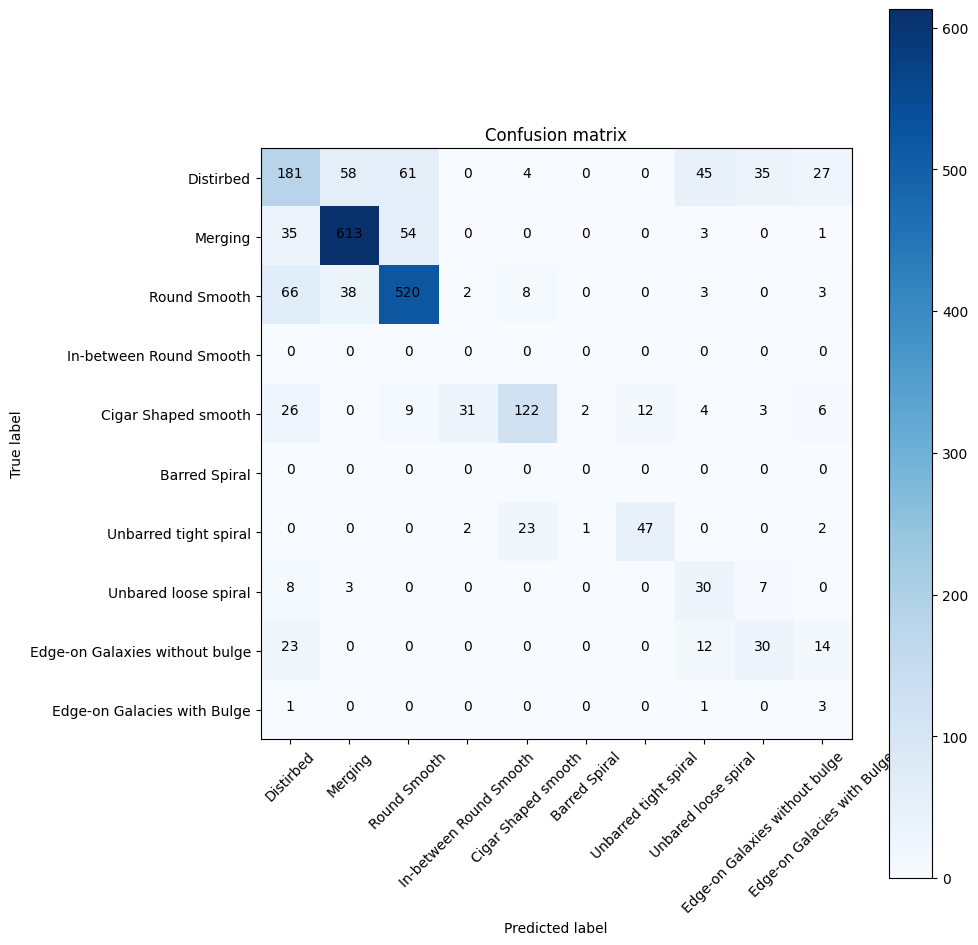

In [ ]:
import itertools
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = model.predict(X_test)

pred_label = np.argmax(pred, axis=1)
actual_label = np.argmax(test_labels, axis=1)

cm = confusion_matrix(pred_label+1, actual_label+1)
print (cm)
plot_confusionM(cm, imageLabel)

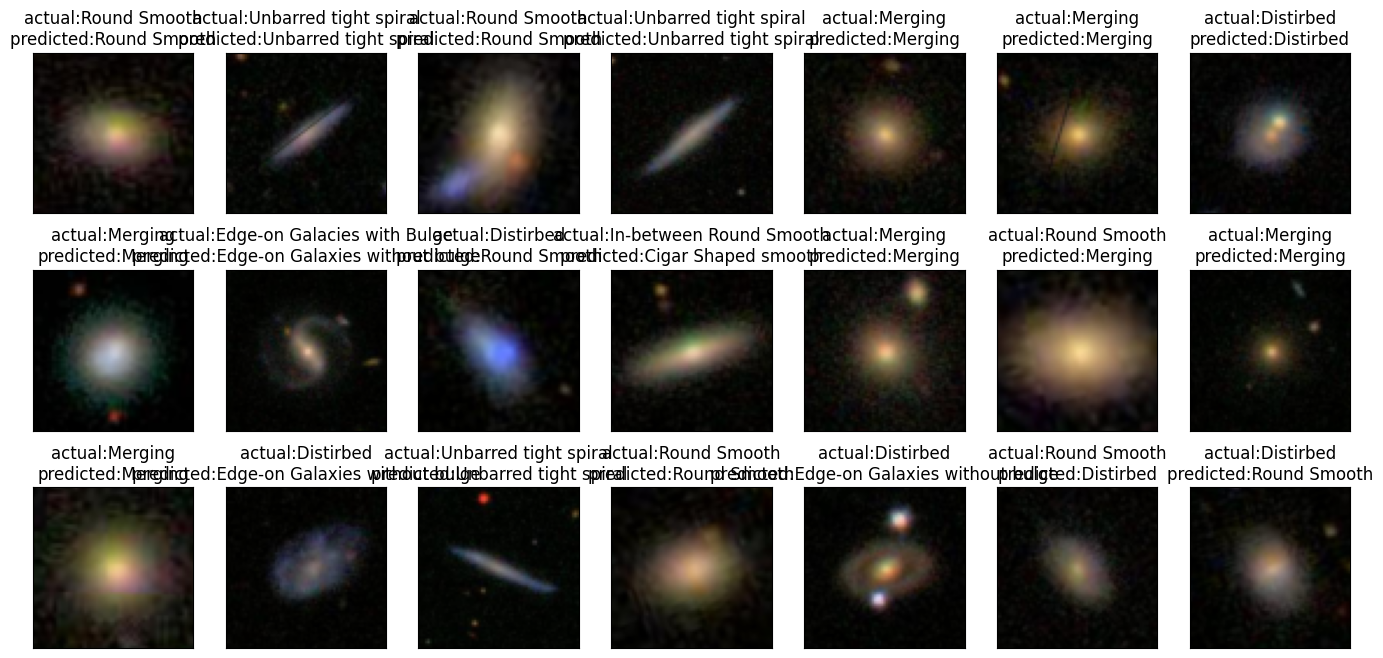

In [ ]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n'
                            + 'predicted:' + imageLabel[pred_label[index]])
        axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()